<a href="https://colab.research.google.com/github/wandaburma/TugasAkhir/blob/main/Sisa_Penjualan_2022_2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***DATASET PENJUALAN***

In [34]:
# Impor library pandas
import pandas as pd

# Membaca file Excel menggunakan pandas
data = pd.read_excel('Data Sisa Penjualan Donat 2022-2023 - FINAL.xlsx')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14340 entries, 0 to 14339
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Variant Rasa    14340 non-null  object        
 1   Tanggal         14340 non-null  datetime64[ns]
 2   Sisa Penjualan  14340 non-null  int64         
 3   Keterangan      14340 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 448.2+ KB


In [35]:
# @title Teks judul default
# Menampilkan beberapa baris pertama dari dataset
data.head(7)

,Variant Rasa,Tanggal,Sisa Penjualan,Keterangan
0,Greentea,2022-01-01,2,Tidak Habis Terjual
1,Greentea,2022-01-02,2,Tidak Habis Terjual
2,Greentea,2022-01-03,2,Tidak Habis Terjual
3,Greentea,2022-01-04,1,Tidak Habis Terjual
4,Greentea,2022-01-05,1,Tidak Habis Terjual
5,Greentea,2022-01-06,0,Habis Terjual
6,Greentea,2022-01-07,5,Tidak Habis Terjual


<ipython-input-36-c78c32820cba>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='Sisa Penjualan', y='Keterangan', inner='box', palette='Dark2')


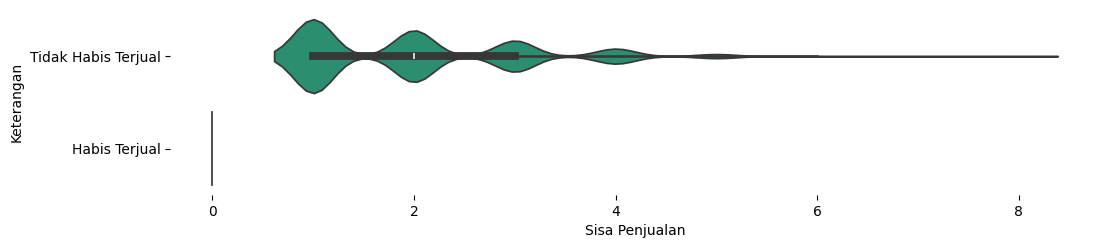

In [36]:
# @title Keterangan vs Sisa Penjualan

from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(data['Keterangan'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='Sisa Penjualan', y='Keterangan', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

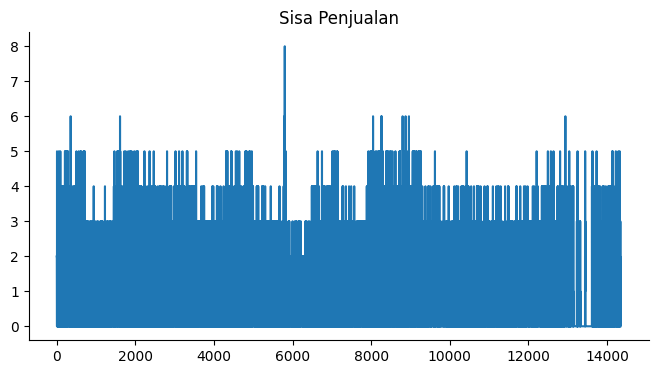

In [37]:
# @title Sisa Penjualan

from matplotlib import pyplot as plt
data['Sisa Penjualan'].plot(kind='line', figsize=(8, 4), title='Sisa Penjualan')
plt.gca().spines[['top', 'right']].set_visible(False)

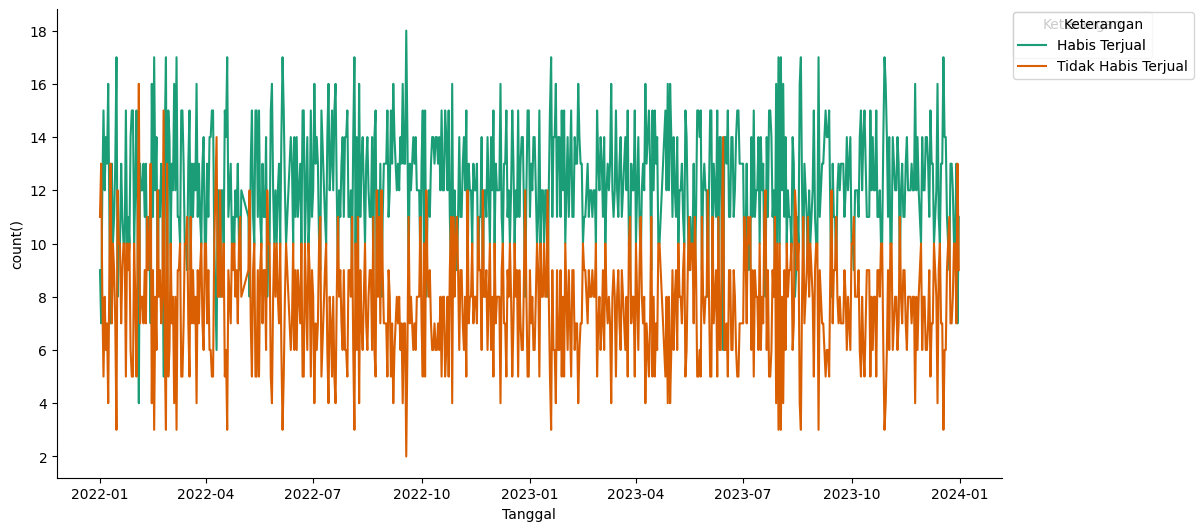

In [38]:
# @title Tanggal vs count()

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['Tanggal']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'Tanggal'}, axis=1)
              .sort_values('Tanggal', ascending=True))
  xs = counted['Tanggal']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Tanggal', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Keterangan')):
  _plot_series(series, series_name, i)
  fig.legend(title='Keterangan', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tanggal')
_ = plt.ylabel('count()')

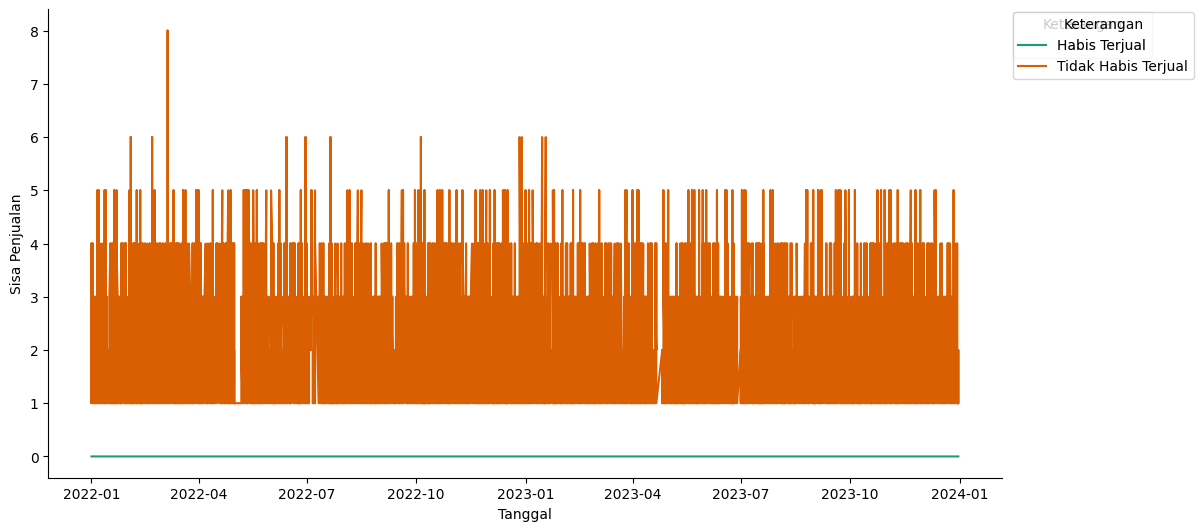

In [39]:
# @title Tanggal vs Sisa Penjualan

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  from matplotlib import pyplot as plt
  import seaborn as sns
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['Tanggal']
  ys = series['Sisa Penjualan']

  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = data.sort_values('Tanggal', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('Keterangan')):
  _plot_series(series, series_name, i)
  fig.legend(title='Keterangan', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('Tanggal')
_ = plt.ylabel('Sisa Penjualan')

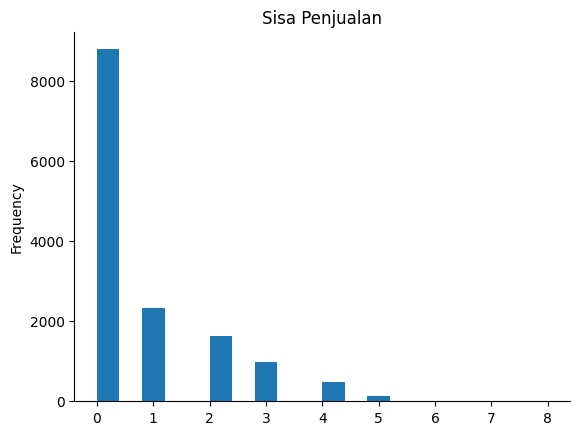

In [40]:
# @title Sisa Penjualan

from matplotlib import pyplot as plt
data['Sisa Penjualan'].plot(kind='hist', bins=20, title='Sisa Penjualan')
plt.gca().spines[['top', 'right',]].set_visible(False)

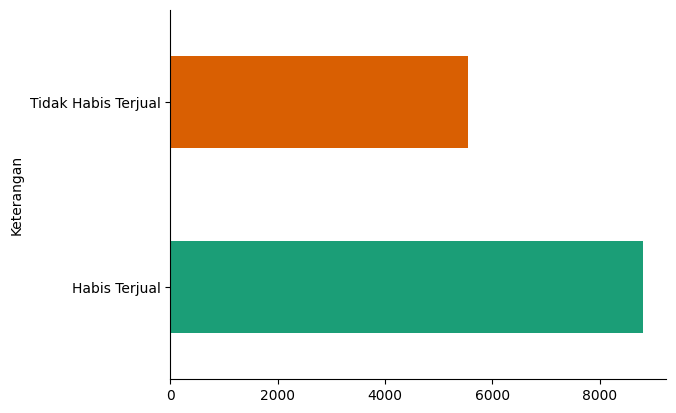

In [41]:
# @title Keterangan

from matplotlib import pyplot as plt
import seaborn as sns
data.groupby('Keterangan').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

# ***MODEL NAIVE BAYES CLASSIFIKASI (NBC)***

In [43]:
# Impor library pandas
import pandas as pd

# Membaca file Excel menggunakan pandas
data = pd.read_excel('Data Sisa Penjualan Donat 2022-2023 - FINAL.xlsx')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14340 entries, 0 to 14339
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Variant Rasa    14340 non-null  object        
 1   Tanggal         14340 non-null  datetime64[ns]
 2   Sisa Penjualan  14340 non-null  int64         
 3   Keterangan      14340 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 448.2+ KB


In [44]:
from sklearn.model_selection import train_test_split

# Bagi data menjadi data pelatihan dan pengujian
X_train, X_test, y_train, y_test = train_test_split(data['Variant Rasa'], data['Keterangan'], test_size=0.1, random_state=42)

In [45]:
# Simpan data latih ke file
train_set = pd.DataFrame({'text': X_train, 'sentiment': y_train})
train_set.to_csv('train_data.csv', index=False)

In [46]:
# Simpan data uji ke file
test_set = pd.DataFrame({'text': X_test, 'sentiment': y_test})
test_set.to_csv('test_data.csv', index=False)

In [47]:
# Menampilkan informasi jumlah data
print(f'Jumlah Data Latih: {len(X_train)}')
print(f'Jumlah Data Uji: {len(X_test)}')

Jumlah Data Latih: 12906
Jumlah Data Uji: 1434


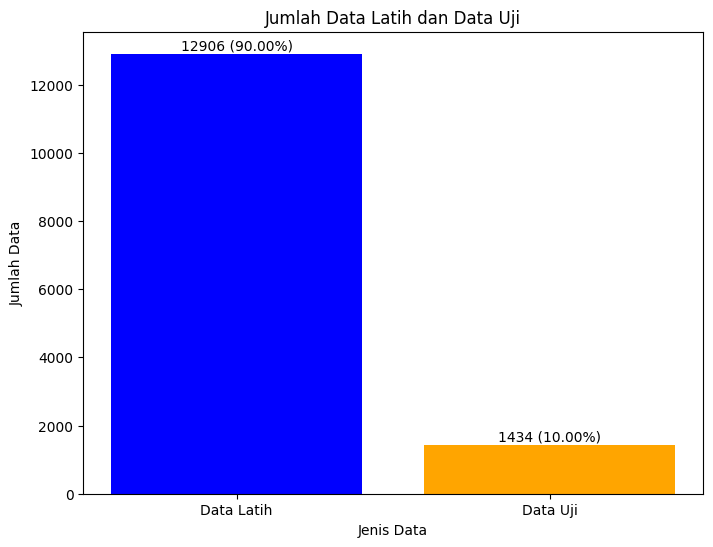

In [48]:
import matplotlib.pyplot as plt

# Jumlah data latih dan data uji
train_size = len(X_train)
test_size = len(X_test)

# Membuat plot
plt.figure(figsize=(8, 6))
bars = plt.bar(['Data Latih', 'Data Uji'], [train_size, test_size], color=['blue', 'orange'])

# Menambahkan label untuk setiap bar (dalam kurung persentase)
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 20, f'{height} ({height / (train_size + test_size) * 100:.2f}%)',
             ha='center', va='bottom')

plt.title('Jumlah Data Latih dan Data Uji')
plt.xlabel('Jenis Data')
plt.ylabel('Jumlah Data')
plt.show()


**NAIVE BAYES CLASDIFIKASI (NBC)**

---



In [49]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn import metrics

In [50]:
# Mengganti NaN dengan string kosong pada data latih dan uji
X_train = X_train.fillna('')
X_test = X_test.fillna('')

# Membuat CountVectorizer
vectorizer = CountVectorizer()

# Melakukan vektorisasi pada data latih dan uji
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

# Membuat dan melatih model Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_vectorized.toarray(), y_train)

# Membuat dan melatih model Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train_vectorized, y_train)

# Membuat dan melatih model Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train_vectorized, y_train)

# Evaluasi model
y_pred_gnb = gnb.predict(X_test_vectorized.toarray())
y_pred_mnb = mnb.predict(X_test_vectorized)
y_pred_bnb = bnb.predict(X_test_vectorized)

from sklearn.metrics import confusion_matrix

# Menampilkan confusion matrix untuk setiap model
print("Gaussian Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_gnb))

print("\nMultinomial Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_mnb))

print("\nBernoulli Naive Bayes Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_bnb))

Gaussian Naive Bayes Confusion Matrix:
[[408 482]
 [217 327]]

Multinomial Naive Bayes Confusion Matrix:
[[890   0]
 [544   0]]

Bernoulli Naive Bayes Confusion Matrix:
[[849  41]
 [507  37]]


In [51]:
# Fungsi untuk plot confusion matrix
def plot_confusion_matrix(model_name, y_true, y_pred):
    # Menghitung confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Membuat plot
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu",
                xticklabels=['Habis','Tidak Habis'],
                yticklabels=['Habis','Tidak Habis'])

    # Menambahkan judul dan label
    plt.title(f"{model_name} Confusion Matrix")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    # Menampilkan plot
    plt.show()

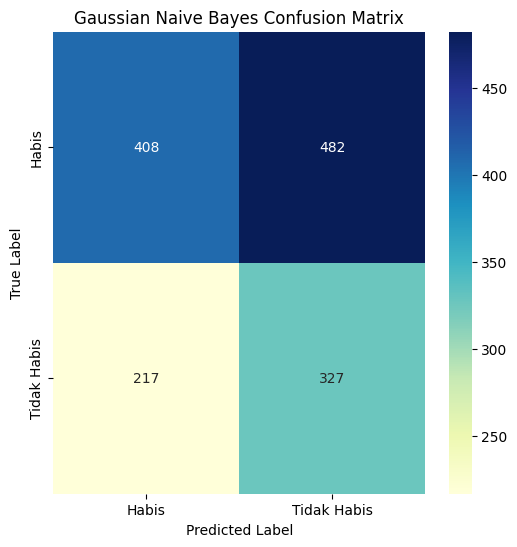

In [52]:
# Membuat dan melatih model Gaussian Naive Bayes
gnb = GaussianNB()
gnb.fit(X_train_vectorized.toarray(), y_train)

# Memprediksi label pada data uji
y_pred_gnb = gnb.predict(X_test_vectorized.toarray())

# Memanggil fungsi plot_confusion_matrix untuk menampilkan confusion matrix
plot_confusion_matrix("Gaussian Naive Bayes", y_test, y_pred_gnb)

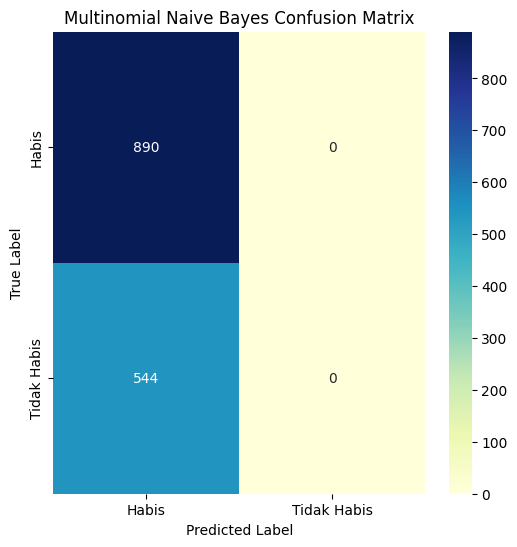

In [53]:
# Membuat dan melatih model Multinomial Naive Bayes
mnb = MultinomialNB()
mnb.fit(X_train_vectorized, y_train)
y_pred_mnb = mnb.predict(X_test_vectorized)
plot_confusion_matrix("Multinomial Naive Bayes", y_test, y_pred_mnb)

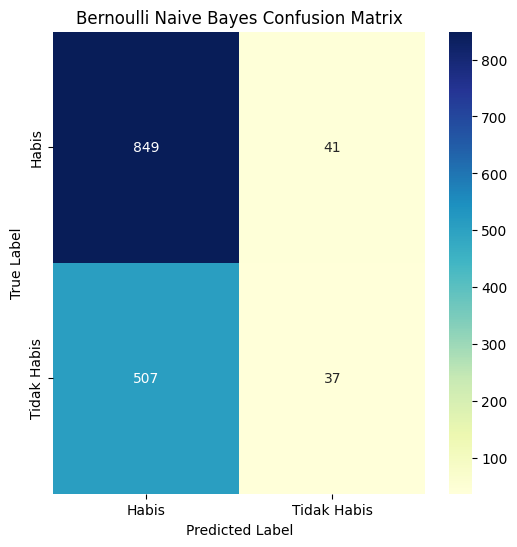

In [54]:
# Membuat dan melatih model Bernoulli Naive Bayes
bnb = BernoulliNB()
bnb.fit(X_train_vectorized, y_train)
y_pred_bnb = bnb.predict(X_test_vectorized)
plot_confusion_matrix("Bernoulli Naive Bayes", y_test, y_pred_bnb)

In [55]:
# Print hasil evaluasi jika diperlukan
print("Gaussian Naive Bayes Accuracy:", metrics.accuracy_score(y_test, y_pred_gnb))
print("Multinomial Naive Bayes Accuracy:", metrics.accuracy_score(y_test, y_pred_mnb))
print("Bernoulli Naive Bayes Accuracy:", metrics.accuracy_score(y_test, y_pred_bnb))

Gaussian Naive Bayes Accuracy: 0.5125523012552301
Multinomial Naive Bayes Accuracy: 0.6206415620641562
Bernoulli Naive Bayes Accuracy: 0.6178521617852162


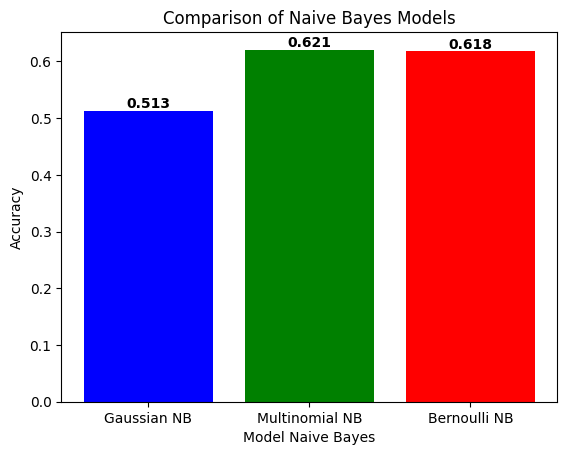

In [56]:
import matplotlib.pyplot as plt

# Membuat list untuk menyimpan akurasi
accuracies = [metrics.accuracy_score(y_test, y_pred_gnb),
              metrics.accuracy_score(y_test, y_pred_mnb),
              metrics.accuracy_score(y_test, y_pred_bnb)]

# Membuat label untuk setiap model
labels = ['Gaussian NB', 'Multinomial NB', 'Bernoulli NB']

# Membuat bar plot
bars = plt.bar(labels, accuracies, color=['blue', 'green', 'red'])

# Menambahkan label dan judul
plt.xlabel('Model Naive Bayes')
plt.ylabel('Accuracy')
plt.title('Comparison of Naive Bayes Models')

# Menambahkan nilai akurasi di atas setiap bar
for bar, accuracy in zip(bars, accuracies):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(accuracy, 3), ha='center', va='bottom', color='black', weight='bold')

# Menampilkan plot
plt.show()


In [57]:
from sklearn.metrics import classification_report

# Menampilkan classification_report untuk setiap model
print("Gaussian Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_gnb))

print("\nMultinomial Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_mnb))

print("\nBernoulli Naive Bayes Classification Report:")
print(classification_report(y_test, y_pred_bnb))

Gaussian Naive Bayes Classification Report:
                     precision    recall  f1-score   support

      Habis Terjual       0.65      0.46      0.54       890
Tidak Habis Terjual       0.40      0.60      0.48       544

           accuracy                           0.51      1434
          macro avg       0.53      0.53      0.51      1434
       weighted avg       0.56      0.51      0.52      1434


Multinomial Naive Bayes Classification Report:
                     precision    recall  f1-score   support

      Habis Terjual       0.62      1.00      0.77       890
Tidak Habis Terjual       0.00      0.00      0.00       544

           accuracy                           0.62      1434
          macro avg       0.31      0.50      0.38      1434
       weighted avg       0.39      0.62      0.48      1434


Bernoulli Naive Bayes Classification Report:
                     precision    recall  f1-score   support

      Habis Terjual       0.63      0.95      0.76       890
T

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ***JUMLAH SETIAP JUMLAH RASA***

In [59]:
# Impor library pandas
import pandas as pd

# Membaca file Excel menggunakan pandas
data = pd.read_excel('Data Sisa Penjualan Donat 2022-2023 - FINAL.xlsx')

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14340 entries, 0 to 14339
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Variant Rasa    14340 non-null  object        
 1   Tanggal         14340 non-null  datetime64[ns]
 2   Sisa Penjualan  14340 non-null  int64         
 3   Keterangan      14340 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 448.2+ KB


In [60]:
data.head()

,Variant Rasa,Tanggal,Sisa Penjualan,Keterangan
0,Greentea,2022-01-01,2,Tidak Habis Terjual
1,Greentea,2022-01-02,2,Tidak Habis Terjual
2,Greentea,2022-01-03,2,Tidak Habis Terjual
3,Greentea,2022-01-04,1,Tidak Habis Terjual
4,Greentea,2022-01-05,1,Tidak Habis Terjual


In [61]:
# Menghitung jumlah total setiap varian rasa
variant_rasa_counts = data['Variant Rasa'].value_counts()

# Menampilkan jumlah total setiap varian rasa
print("Jumlah Setiap Varian Rasa:")
print(variant_rasa_counts)

Jumlah Setiap Varian Rasa:
Greentea          717
Crumble Matcha    717
Keju              717
Oreo              717
Taro              717
Bubble Gum        717
Vanila Kopi       717
Coklat Meses      717
Vanila Kacang     717
Coklat Kacang     717
Strawberry        717
Tiramisu          717
Avocado           717
Coklat Dark       717
Vanila Oreo       717
Caramel           717
Coklat Oreo       717
Mocha             717
Coklat Keju       717
Red Velvet        717
Name: Variant Rasa, dtype: int64


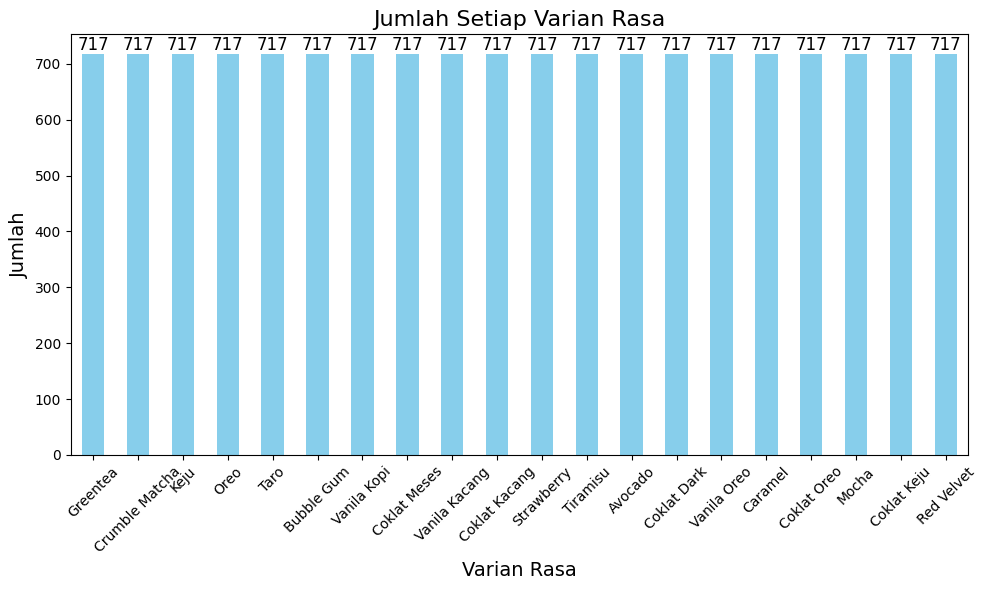

In [62]:
# Menampilkan bar chart
plt.figure(figsize=(10, 6))
bars = variant_rasa_counts.plot(kind='bar', color='skyblue')
plt.title('Jumlah Setiap Varian Rasa', fontsize=16)
plt.xlabel('Varian Rasa', fontsize=14)
plt.ylabel('Jumlah', fontsize=14)

# Menambahkan label jumlah di atas setiap bar
for i, count in enumerate(variant_rasa_counts):
    plt.text(i, count + 0.5, str(count), ha='center', va='bottom', fontsize=12)

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# ***TOTAL JUMLAH SISA PENJUALAN TIAP RASA***

In [63]:
data.head()

,Variant Rasa,Tanggal,Sisa Penjualan,Keterangan
0,Greentea,2022-01-01,2,Tidak Habis Terjual
1,Greentea,2022-01-02,2,Tidak Habis Terjual
2,Greentea,2022-01-03,2,Tidak Habis Terjual
3,Greentea,2022-01-04,1,Tidak Habis Terjual
4,Greentea,2022-01-05,1,Tidak Habis Terjual


In [64]:
# Mengelompokkan data berdasarkan rasa dan menjumlahkan sisa penjualan
penjualan_per_rasa = data.groupby('Variant Rasa')['Sisa Penjualan'].sum()

# Menampilkan hasil
print(penjualan_per_rasa)

Variant Rasa
Avocado           441
Bubble Gum        491
Caramel           494
Coklat Dark       514
Coklat Kacang     807
Coklat Keju       665
Coklat Meses      286
Coklat Oreo       590
Crumble Matcha    449
Greentea          686
Keju              249
Mocha             569
Oreo              607
Red Velvet        631
Strawberry        492
Taro              524
Tiramisu          641
Vanila Kacang     752
Vanila Kopi       571
Vanila Oreo       667
Name: Sisa Penjualan, dtype: int64


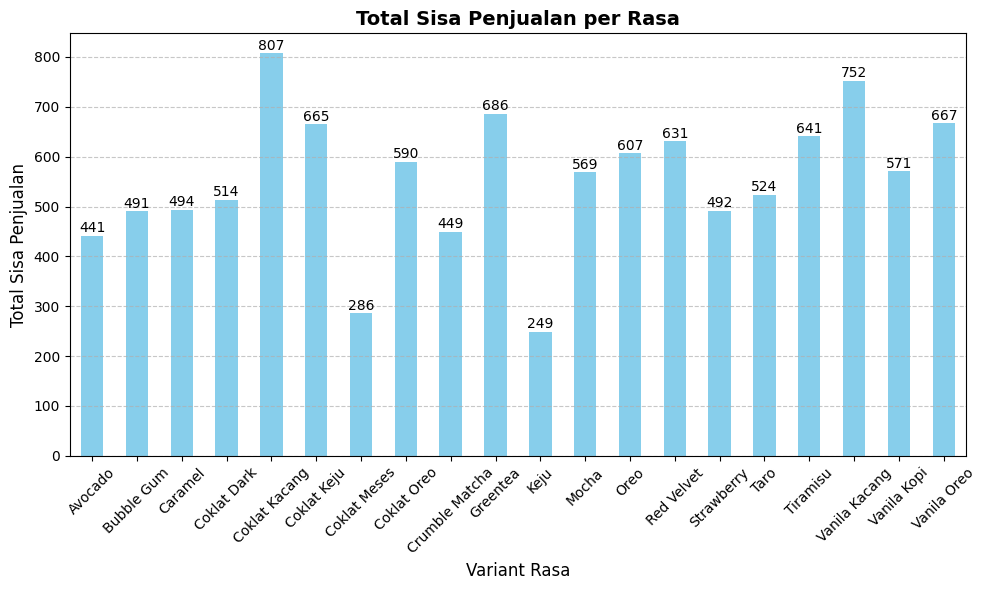

In [65]:
# Membuat plot
plt.figure(figsize=(10, 6))
penjualan_per_rasa.plot(kind='bar', color='skyblue')
plt.title('Total Sisa Penjualan per Rasa', fontdict={'fontsize': 14, 'fontweight': 'bold'})
plt.xlabel('Variant Rasa', fontdict={'fontsize': 12})
plt.ylabel('Total Sisa Penjualan', fontdict={'fontsize': 12})
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Menambahkan teks di setiap batang
for i, value in enumerate(penjualan_per_rasa):
    plt.text(i, value + 1, str(value), ha='center', va='bottom')

plt.tight_layout()
plt.show()